## Maria Harrison
### CS 8395-51- Introduction to Quantum Computing
#### Final Project: Shor’s Algorithm, Bernstein-Vazirani, and Deutsch-Josza Algorithm: A Deep Dive

## DEUTSCH-JOSZA ALGORITHM

In [10]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram


In [2]:
# create  oracle function 
""""
    params
        returnQGate flag 1 or 0. 1 returns a quantum gate (function)
            0 returns a circuit that generates bitstrings such as 0100, 1000 for n = 4.
        n: length of bitstring

    return
        quantum_gate, quantum_circuit
"""
def oracle(returnQGate, n):


    # making quantum circuit to return, setting input to n+1 qubit size
    quantumCircuit = QuantumCircuit(n + 1)
    
    # case if oracle returns a quantum gate
    if returnQGate == 1:
        # getting random numb to know which CNOTs should wrap in X-gates
        b = np.random.randint(1,2**n)

        # reformating random numb as binary string 
        b_str = format(b, '0'+str(n)+'b')

        # iterating thru qubits (digits) of binary string
        for qubit in range(len(b_str)):
            # if bit value is 1 proceed, if value is 0 skip
            if b_str[qubit] == '1':
                # apply X gate to qubit to activate
                quantumCircuit.x(qubit)
      
        # iterating thru qubits to set controlled not gate
        for qubit in range(n):
            quantumCircuit.cx(qubit, n)

        # setting leftover x gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                quantumCircuit.x(qubit)

    # case if oracle returns a quantum circuit
    if returnQGate == 0:

        # randomizing oracle's fixed output qubit value 
        output = np.random.randint(2)
        if output == 1:
            quantumCircuit.x(n)
    
    quantumGate = quantumCircuit.to_gate()
    quantumGate.name = "Oracle" 
    
    return quantumGate, quantumCircuit

In [3]:
'''create a quantum circuit to implelemtn deutsch jozsa algorithm
    parameters
        oracle: quantum circuit
        n: length of bitstring

    return
        deustch jozsa algorithm as a quantum circ

'''

def deutsch_jozsa_alg(oracle, n):
    djCircuit = QuantumCircuit(n+1, n)
    # setting output x gate qubits
    djCircuit.x(n)

    # setting output h gate qubits
    djCircuit.h(n)

    # set up input register and setting h gate
    for qubit in range(n):
        djCircuit.h(qubit)

    # add return from oracle() func to circuit
    djCircuit.append(oracle, range(n+1))
    
    # set h gates
    for qubit in range(n):
        djCircuit.h(qubit)
    
    # measure perforamnce
    for i in range(n):
        djCircuit.measure(i, i)
    
    return djCircuit

/opt/homebrew/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


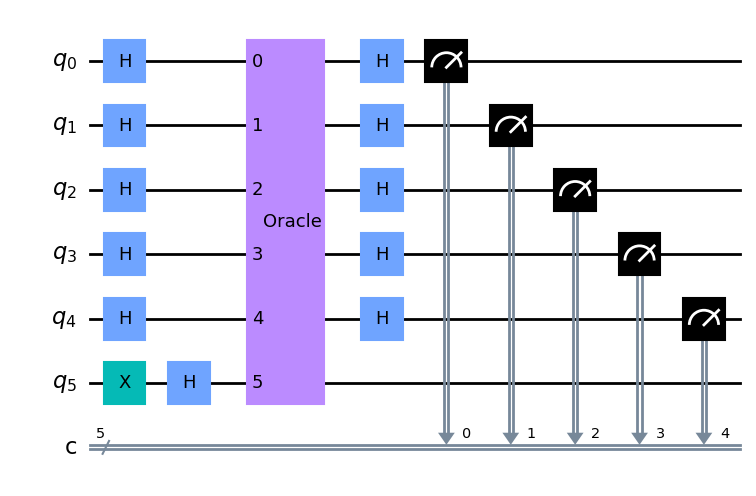

In [4]:
#return circiut

oracleQGate, oracleQCircuit = oracle(returnQGate= 0, n = 5)
djQCircuit = deutsch_jozsa_alg(oracleQGate, n = 5)
djQCircuit.draw('mpl')

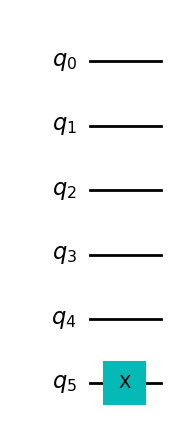

In [5]:
oracleQCircuit.draw('mpl')

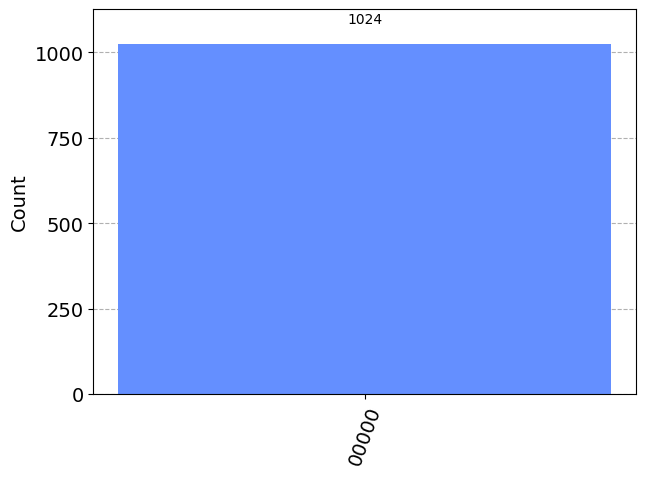

In [6]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
djCircuitTranspiled = transpile(djQCircuit, aer_sim)
results = aer_sim.run(djCircuitTranspiled).result()
answer = results.get_counts()
plot_histogram(answer)

/opt/homebrew/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


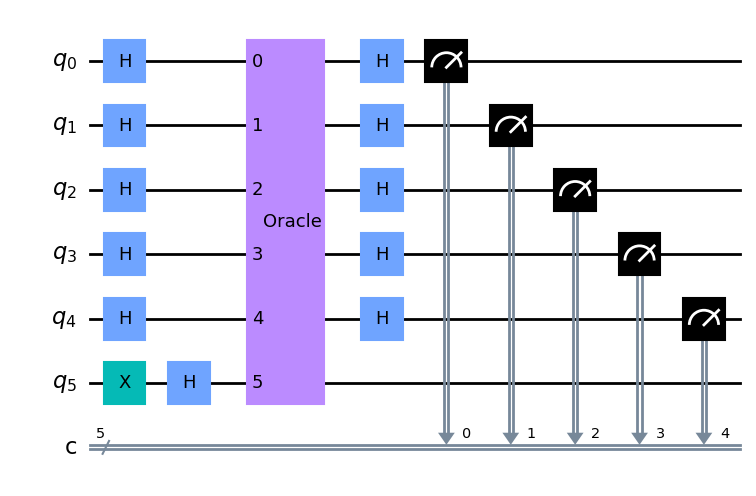

In [7]:
#return quantum gate
oracleQGate, oracleQCircuit= oracle(returnQGate = 1, n = 5)
djQCircuit = deutsch_jozsa_alg(oracleQGate, n = 5)
djQCircuit.draw('mpl')

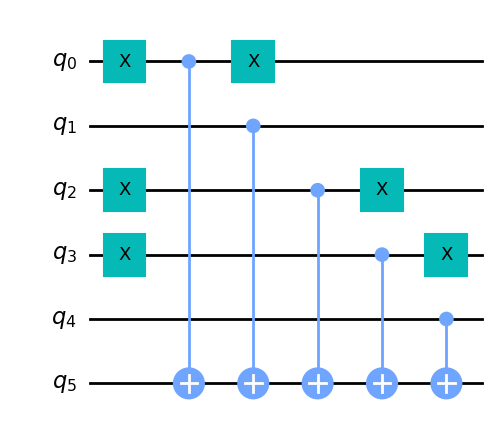

In [8]:
oracleQCircuit.draw('mpl')

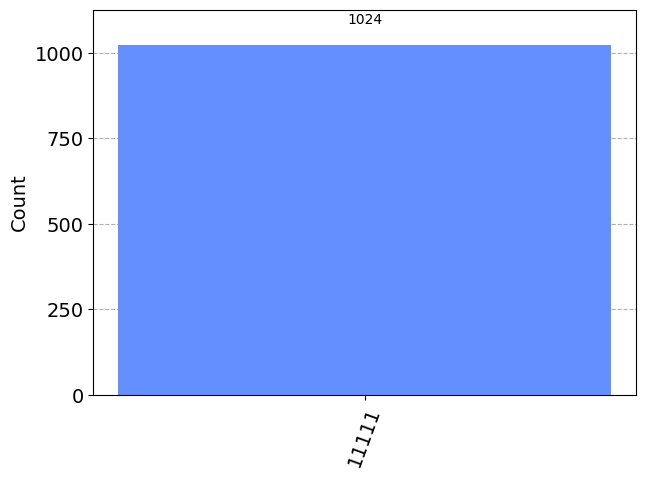

In [9]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
djCircuitTranspiled = transpile(djQCircuit, aer_sim)
results = aer_sim.run(djCircuitTranspiled).result()
answer = results.get_counts()
plot_histogram(answer)